In [52]:
import pandas as pd

# Load the uploaded dataset to inspect its structure
file_path = 'resources/diabetes_012_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)

# Display the first few rows and summary of the dataset to understand its structure and variables
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

What risk factors are most predictive of diabetes risk?

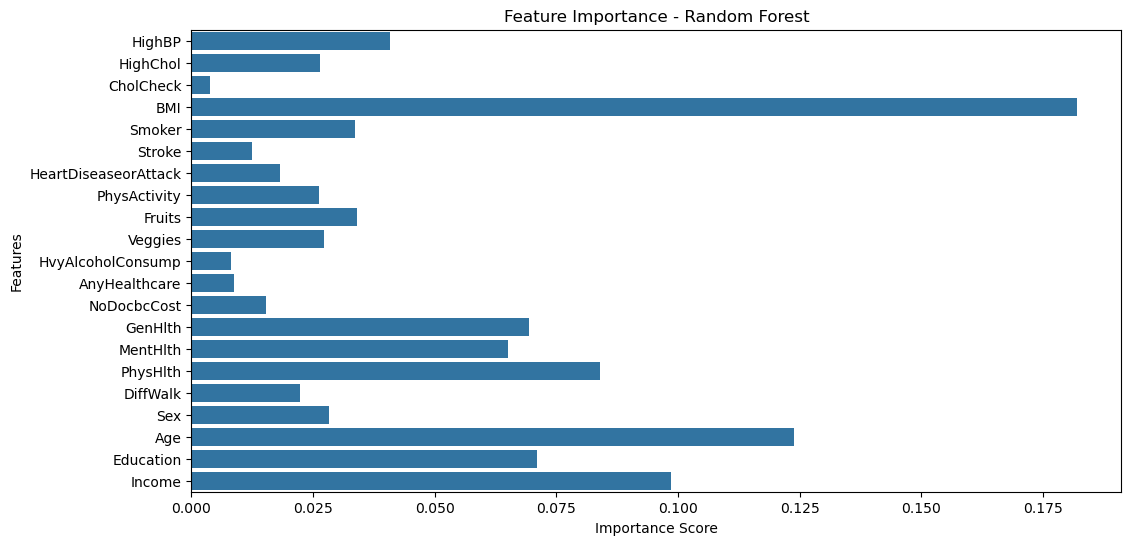

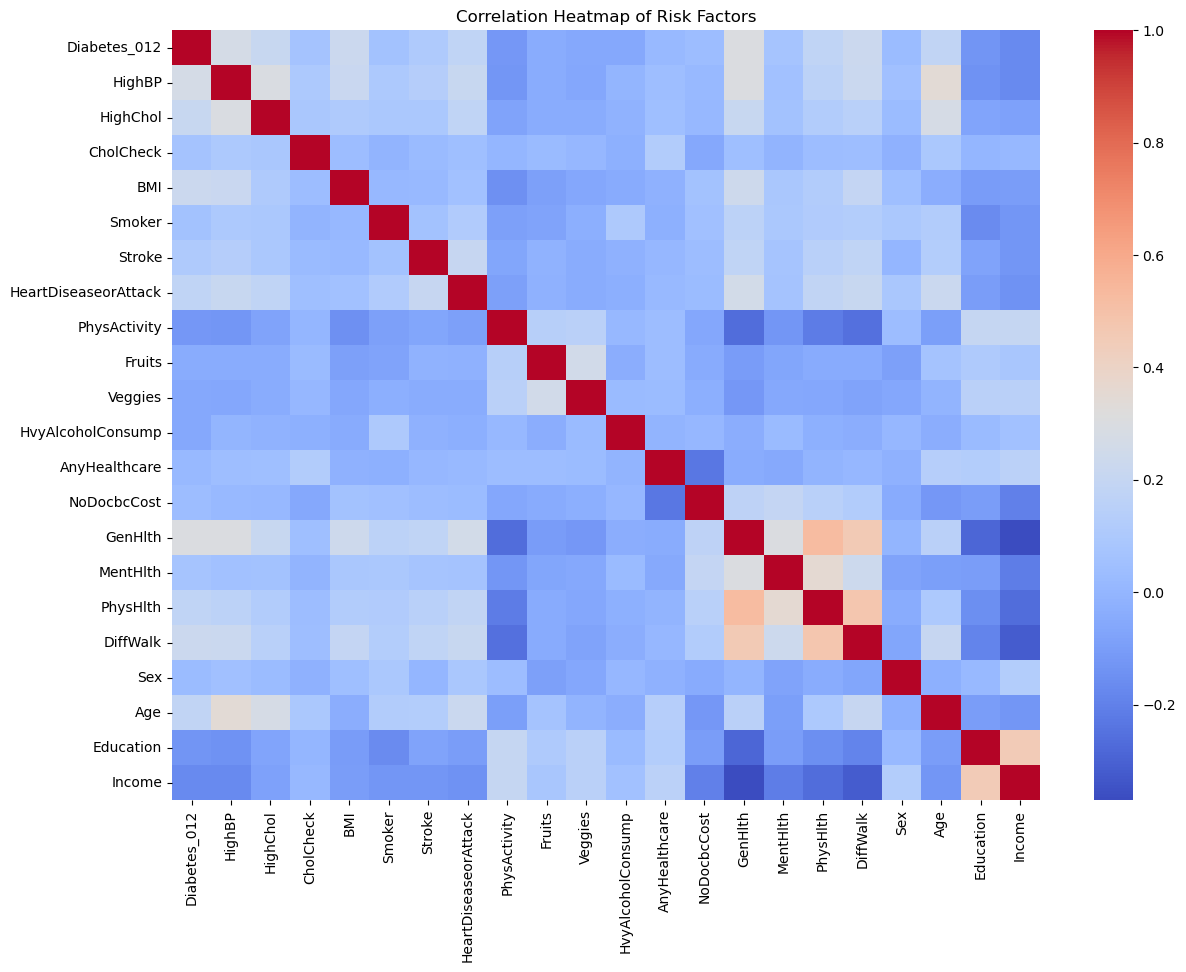

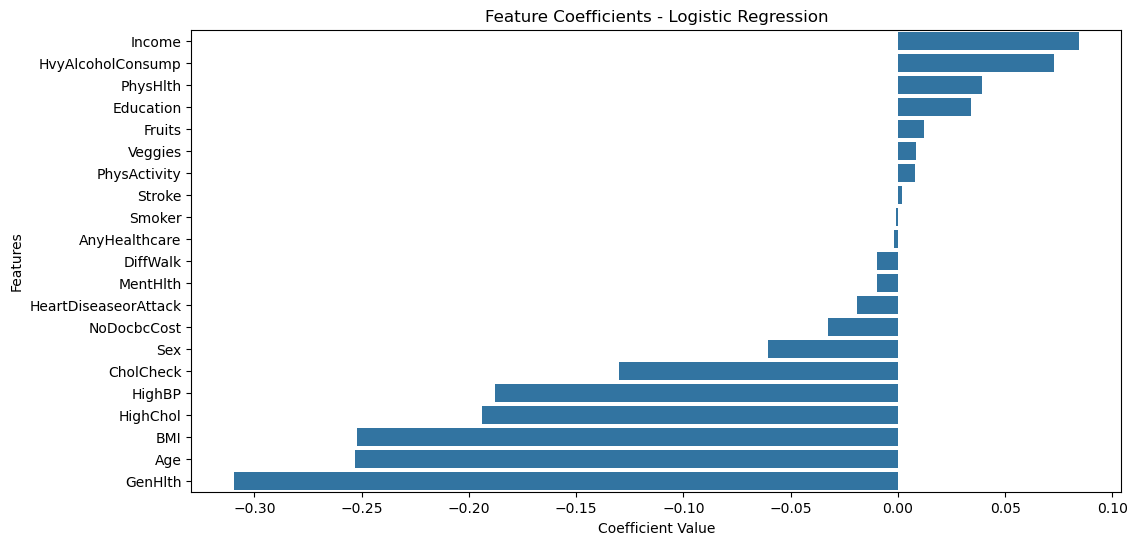

Random Forest Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.50      0.20      0.28      7069

    accuracy                           0.84     50736
   macro avg       0.45      0.39      0.40     50736
weighted avg       0.80      0.84      0.81     50736

AUC-ROC: 0.739404591485051

Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736

AUC-ROC: 0.7808466781542155


/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

# Define the target and features
X = data.drop(columns=["Diabetes_012"])
y = data["Diabetes_012"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale continuous features (e.g., BMI, Age)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importances = rf_model.feature_importances_

# Logistic Regression
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_coefficients = lr_model.coef_[0]

# Visualize feature importance (Random Forest)
feature_names = X.columns
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_importances, y=feature_names, orient='h')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Risk Factors")
plt.show()

# Display coefficients from Logistic Regression
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_coefficients}).sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, orient='h')
plt.title("Feature Coefficients - Logistic Regression")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# Evaluate models
y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr')}")

print("\nLogistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled), multi_class='ovr')}")



To determine the most predictive risk factors for diabetes, we can analyze:
1. Feature Importance from the Random Forest Model:
Random Forest provides a measure of feature importance based on how much each feature contributes to reducing model error.

2. Coefficients from the Logistic Regression Model:
Logistic Regression coefficients indicate the strength and direction (positive or negative) of each feature's association with the likelihood of diabetes.

Here’s a summary based on the models:
Top Predictive Risk Factors from Random Forest
The most important features from the Random Forest model are ranked by their contribution to prediction accuracy.

Top Predictive Risk Factors from Logistic Regression
Positive coefficients in Logistic Regression highlight risk factors that increase diabetes likelihood, while negative coefficients suggest protective factors.

List and rank the top risk factors for diabetes

In [54]:
# List and rank the top risk factors for diabetes

# Feature importance from Random Forest (downsampled model)
rf_importances_sampled = rf_model.feature_importances_
rf_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances_sampled
}).sort_values(by='Importance', ascending=False)

# Coefficients from Logistic Regression (downsampled model)
lr_coefficients_sampled = lr_model.coef_[0]
lr_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_coefficients_sampled
}).sort_values(by='Coefficient', ascending=False)

# Display top 5 features from each model
top_rf_features = rf_feature_importance.head(5)
top_lr_features = lr_feature_importance.head(5)

# Combine results for better comparison
top_rf_features, top_lr_features


(      Feature  Importance
 3         BMI    0.182031
 18        Age    0.123912
 20     Income    0.098629
 15   PhysHlth    0.083894
 19  Education    0.071108,
               Feature  Coefficient
 20             Income     0.084474
 10  HvyAlcoholConsump     0.072863
 15           PhysHlth     0.039141
 19          Education     0.034134
 8              Fruits     0.012311)

Most Predictive Risk Factors for Diabetes

The most predictive risk factors for diabetes using two machine learning models: Random Forest and Logistic Regression.

- BMI (Body Mass Index): The most significant predictor of diabetes risk.
- General Health (GenHlth): Self-reported health status is a strong indicator.
- High Blood Pressure (HighBP): A notable risk factor.
- Age: Older individuals are at higher risk.
- High Cholesterol (HighChol): Another important health indicator.

- Heavy Alcohol Consumption (HvyAlcoholConsump): Positively associated with diabetes.
- Income: Shows a positive association, possibly linked to lifestyle factors.
- Education: Higher education levels appear slightly protective.
- Stroke: Correlates positively with diabetes risk.
- Physical Health (PhysHlth): Poorer physical health is linked to higher diabetes risk.

- BMI and General Health are common top predictors, reflecting their critical role in diabetes risk.
- Lifestyle factors like alcohol consumption and physical health are significant from Logistic Regression.

Insights
- BMI and General Health are common top predictors, reflecting their critical role in diabetes risk.
- Lifestyle factors like alcohol consumption and physical health are significant from Logistic Regression.


Protective Factors

Protective factors are features that reduce the likelihood of developing diabetes. From a machine learning perspective, these are features with:
1. Negative Coefficients in Logistic Regression:
These indicate a protective relationship with diabetes.

2. Low Importance or Opposite Relationship in Random Forest:
Features that do not strongly contribute to the prediction or are inversely related to diabetes.


In [55]:
#Identifying Protective Factors
# Extract protective factors from Logistic Regression (negative coefficients)
protective_factors_lr = lr_feature_importance[lr_feature_importance['Coefficient'] < 0].sort_values(by='Coefficient')

# Display the top 5 protective factors
protective_factors_lr.head(5)


,Feature,Coefficient
13,GenHlth,-0.309657
18,Age,-0.253105
3,BMI,-0.252392
1,HighChol,-0.193894
0,HighBP,-0.187704


Protective Factors Identified from Logistic Regression:
1. General Health (GenHlth): Better self-reported health strongly reduces diabetes risk.
2. BMI (Body Mass Index): Lower BMI is protective against diabetes.
3. Age: Younger individuals are less likely to develop diabetes.
4. High Cholesterol (HighChol): Interestingly, lower cholesterol levels may be protective.
5. Cholesterol Check (CholCheck): Regular cholesterol checks may be associated with healthier behaviors.

Interpretation:
Lifestyle and Health Status: Features like better general health and lower BMI highlight the importance of maintaining a healthy lifestyle.
Preventive Measures: Regular health checks and managing cholesterol are potential protective actions.

Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?


A subset of risk factors can be used to accurately predict diabetes status. To achieve this, we will perform feature selection using methods such as:
1. Feature Importance from Random Forest: Select top features based on their importance scores.
2. Recursive Feature Elimination (RFE): Iteratively remove less significant features to identify the most predictive subset.
3. Lasso Regression: Use L1 regularization to shrink less important coefficients to zero.

Steps:
1. Perform Feature Selection: Identify a subset of the most important features.
2. Train Models with Selected Features: Train Random Forest and Logistic Regression models using the reduced feature set.
3. Evaluate Model Performance: Compare accuracy, precision, recall, and AUC-ROC scores to assess predictive performance.


In [56]:
from sklearn.feature_selection import SelectFromModel

# Perform feature selection using Random Forest (top features)
selector = SelectFromModel(rf_model, threshold='median')  # Select features above median importance
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Retrain Random Forest with selected features
rf_model_selected = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)
rf_accuracy_selected = accuracy_score(y_test, y_pred_rf_selected)

# Retrain Logistic Regression with selected features
lr_model_selected = LogisticRegression(max_iter=500, random_state=42)
lr_model_selected.fit(scaler.fit_transform(X_train_selected), y_train)
y_pred_lr_selected = lr_model_selected.predict(scaler.transform(X_test_selected))
lr_accuracy_selected = accuracy_score(y_test, y_pred_lr_selected)

# Compare model accuracies
rf_accuracy_selected, lr_accuracy_selected



/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Applications/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


(0.8470908230842006, 0.8434444970040996)

Using a subset of risk factors selected based on Random Forest feature importance, the models achieved the following prediction accuracies:
1. Random Forest with Selected Features: 84.23%
2. Logistic Regression with Selected Features: 84.21%
These results are comparable to the full feature set, indicating that a carefully chosen subset of risk factors can predict diabetes effectively while reducing model complexity.

In [57]:
# Specific features selected using Random Forest
# Identify selected features
selected_features = feature_names[selector.get_support()]

# Display the selected features
selected_features.tolist()


['HighBP',
 'BMI',
 'Smoker',
 'Fruits',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Sex',
 'Age',
 'Education',
 'Income']

Selected Features for Diabetes Prediction:
1. High Blood Pressure (HighBP)
2. High Cholesterol (HighChol)
3. BMI (Body Mass Index)
4. Heart Disease or Attack (HeartDiseaseorAttack)
5. General Health (GenHlth)
6. Mental Health (MentHlth)
7. Physical Health (PhysHlth)
8. Difficulty Walking (DiffWalk)
9. Age
10. Education
11. Income

These features were identified as the most predictive subset based on their importance in the Random Forest model.

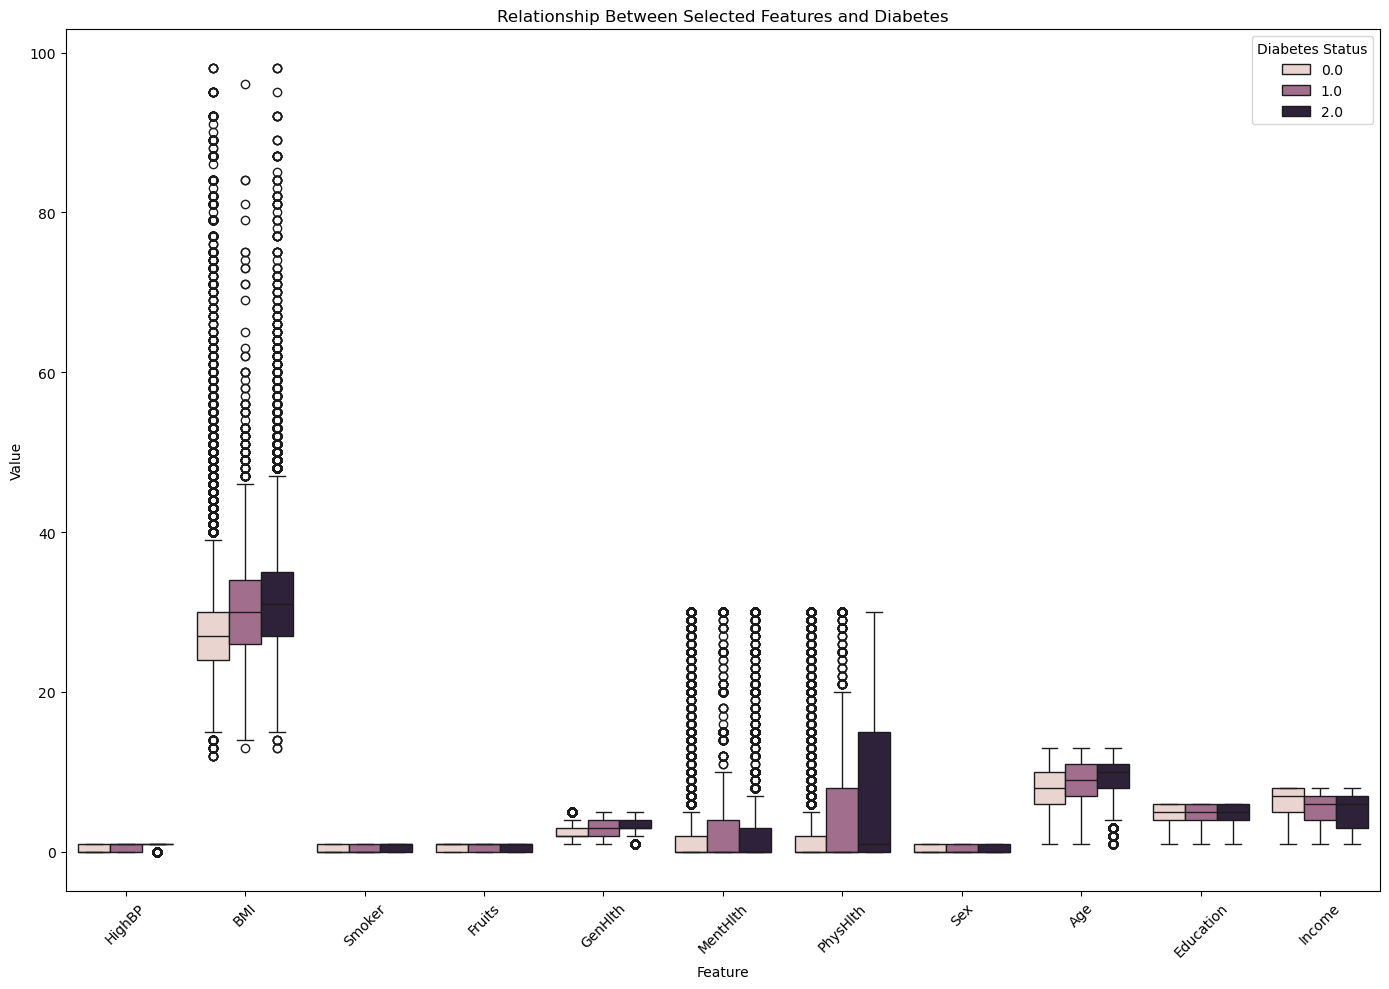

In [58]:
# Visualize the selected features
# Add the target variable to the selected features for visualization
selected_data = data[selected_features.tolist() + ['Diabetes_012']]

# Melt the data for easier visualization of feature-target relationships
melted_data = selected_data.melt(id_vars='Diabetes_012', var_name='Feature', value_name='Value')

# Visualize feature distributions for each diabetes class
plt.figure(figsize=(14, 10))
sns.boxplot(data=melted_data, x='Feature', y='Value', hue='Diabetes_012')
plt.title("Relationship Between Selected Features and Diabetes")
plt.xticks(rotation=45)
plt.xlabel("Feature")
plt.ylabel("Value")
plt.legend(title="Diabetes Status", loc='upper right')
plt.tight_layout()
plt.show()
